In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
sns.set_style('whitegrid')
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
from sklearn.preprocessing import LabelEncoder
pl.style.use('fivethirtyeight')



In [56]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [57]:
df=df.iloc[:,:2]
df.columns=['label','message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


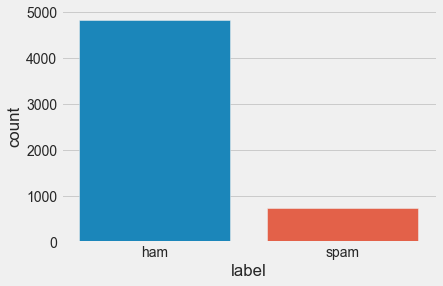

In [59]:
sns.countplot(df['label'])

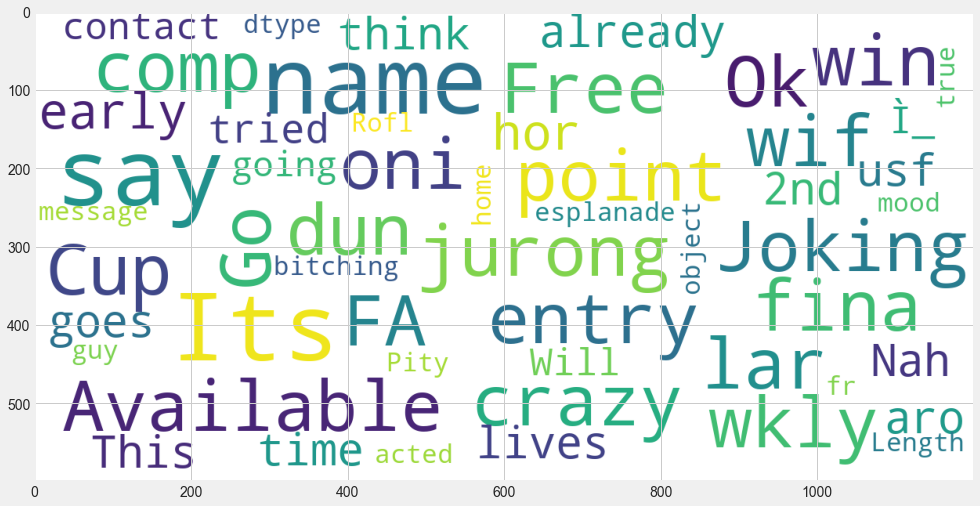

In [60]:
def showWordcloud(data):
    wordcloud=WordCloud(
                        background_color='white',
                        stopwords=stopwords,
                        max_words=20000,
                        max_font_size=40,
                        scale=3,
                        random_state=None
                        ).generate(str(data))
    
    
    pl.figure(figsize=(15,10))
    pl.imshow(wordcloud)
    pl.show()
    
    
showWordcloud(df['message'])

In [61]:
df['label'].describe()

count     5572
unique       2
top        ham
freq      4825
Name: label, dtype: object

In [62]:
df['message'].describe()

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: message, dtype: object

In [63]:
lbl_enc=LabelEncoder()
df['label_enc']=lbl_enc.fit_transform(df['label'])
df.head()

,label,message,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [64]:
df['length_of_msz']=df['message'].apply(len)

In [65]:
df.head()

,label,message,label_enc,length_of_msz
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [66]:
df['length_of_msz'].nunique()

274

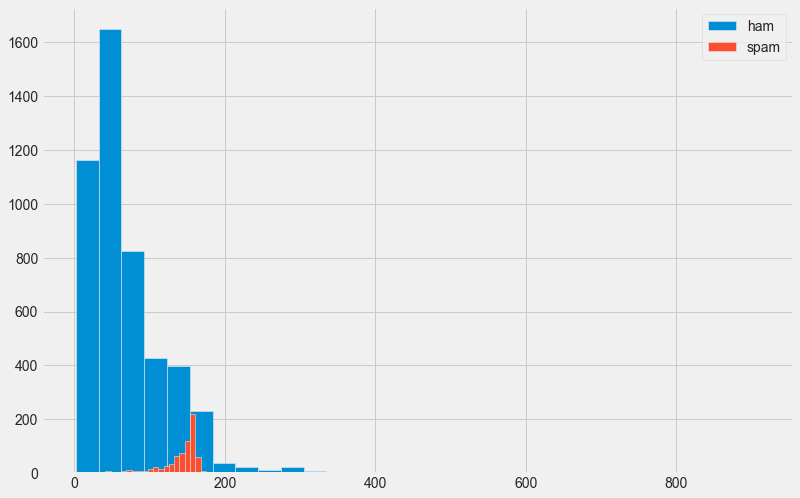

In [67]:
pl.figure(figsize=(12,8))
pl.hist(df[df['label']=='ham']['length_of_msz'],bins=30,label='ham')
pl.hist(df[df['label']=='spam']['length_of_msz'],bins=30,label='spam')
pl.legend()
pl.show()

In [68]:
df[df['label']=='ham'].describe()

,label_enc,length_of_msz
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [69]:
df[df['label']=='spam'].describe()

,label_enc,length_of_msz
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [70]:
df[df['length_of_msz']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [71]:
import string
from nltk.corpus import stopwords

def text_process(message):
    stopword=stopwords.words('english')+['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    
    nonpunc=[i for i in message if i not in string.punctuation]
    nonpunc=''.join(nonpunc)
    
    return ' '.join([word for word in nonpunc.split() if word.lower() not in stopword])
    
    
text_process(df['message'][0])

'Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat'

In [72]:
df['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [73]:
df['cleand_msz']=df['message'].apply(lambda x: text_process(x))

In [74]:
df.head()

,label,message,label_enc,length_of_msz,cleand_msz
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [75]:
df['clean_msz_len']=df['cleand_msz'].apply(len)
df.head()

,label,message,label_enc,length_of_msz,cleand_msz,clean_msz_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...,82
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...,133
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say,31
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though,38


In [76]:
from collections import Counter


In [77]:
words=df[df['label']=='ham'].cleand_msz.apply(lambda x: [word.lower() for word in x.split()])

In [78]:
ham_words=Counter()
for msz in words:
    ham_words.update(msz)

In [79]:
most_common=ham_words.most_common(20)

In [80]:
most_common

[('get', 303),
 ('ltgt', 276),
 ('ok', 272),
 ('go', 247),
 ('ill', 236),
 ('know', 232),
 ('got', 231),
 ('like', 229),
 ('call', 229),
 ('come', 224),
 ('good', 222),
 ('time', 189),
 ('day', 187),
 ('love', 185),
 ('going', 167),
 ('want', 163),
 ('one', 162),
 ('home', 160),
 ('lor', 160),
 ('need', 156)]

In [81]:
words=[]
counts=[]
for i in range(len(most_common)):
    words.append(most_common[i][0])
    counts.append(most_common[i][1])


In [82]:
words,counts

(['get',
  'ltgt',
  'ok',
  'go',
  'ill',
  'know',
  'got',
  'like',
  'call',
  'come',
  'good',
  'time',
  'day',
  'love',
  'going',
  'want',
  'one',
  'home',
  'lor',
  'need'],
 [303,
  276,
  272,
  247,
  236,
  232,
  231,
  229,
  229,
  224,
  222,
  189,
  187,
  185,
  167,
  163,
  162,
  160,
  160,
  156])

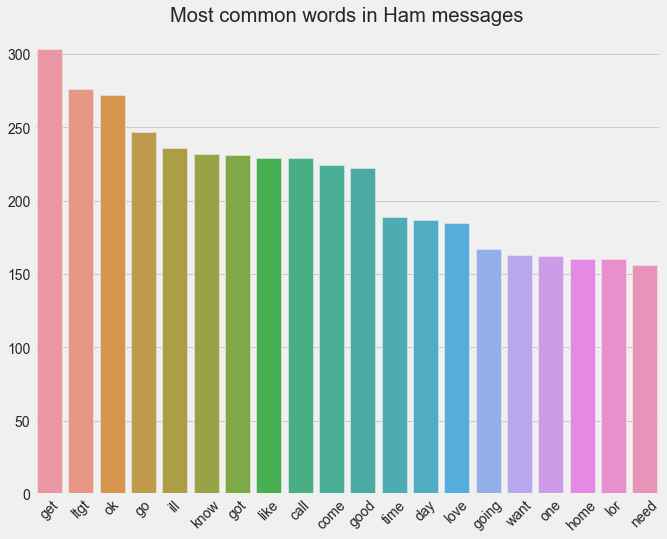

In [83]:
pl.figure(figsize=(10,8))
sns.barplot(x=words,y=counts)
pl.xticks(rotation=45)
pl.title('Most common words in Ham messages')
pl.show()

In [84]:
words=df[df['label']=='spam'].cleand_msz.apply(lambda x: [word.lower() for word in x.split()])
spam_words=Counter()
for msz in words:
    spam_words.update(msz)


most_common=spam_words.most_common(20)

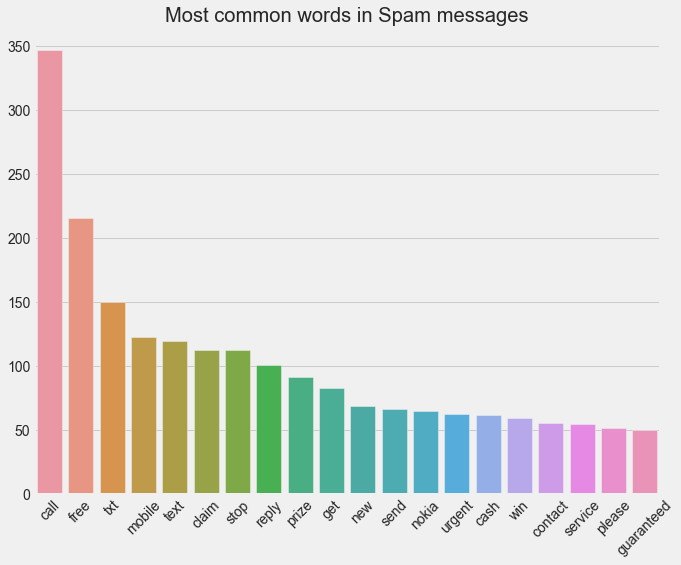

In [86]:
words=[]
counts=[]
for i in range(len(most_common)):
    words.append(most_common[i][0])
    counts.append(most_common[i][1])
pl.figure(figsize=(10,8))
sns.barplot(x=words,y=counts)
pl.xticks(rotation=45)
pl.title('Most common words in Spam messages')
pl.show()

In [88]:
X=df.cleand_msz
y=df.label_enc
X.shape,y.shape

((5572,), (5572,))

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4179,), (4179,), (1393,), (1393,))

In [104]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vect=CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [105]:
X_train_vectorized=vect.transform(X_train)
temp=X_train_vectorized.toarray()[:1]
temp

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [106]:
len(temp[0])

7996

In [108]:
np.where(temp[0]!=0)

(array([ 866,  867,  883,  988, 1123, 1567, 1650, 2013, 2234, 2359, 2375,
        3459, 3666, 4447, 4764, 5396, 5601, 6042, 6071, 6350, 6722, 7142,
        7643, 7814], dtype=int64),)

In [109]:
temp[0][[ 866,  867,  883,  988, 1123, 1567, 1650, 2013, 2234, 2359, 2375,
        3459, 3666, 4447, 4764, 5396, 5601, 6042, 6071, 6350, 6722, 7142,
        7643, 7814]]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       3, 1], dtype=int64)

In [110]:
vect=TfidfVectorizer()
vect.fit(X_train)
X_train_vectorized=vect.transform(X_train)
temp=X_train_vectorized.toarray()[:1]
temp


array([[0., 0., 0., ..., 0., 0., 0.]])

In [111]:
len(temp[0])

7996

In [112]:
np.where(temp[0]!=0)

(array([ 866,  867,  883,  988, 1123, 1567, 1650, 2013, 2234, 2359, 2375,
        3459, 3666, 4447, 4764, 5396, 5601, 6042, 6071, 6350, 6722, 7142,
        7643, 7814], dtype=int64),)

In [113]:
temp[0][[ 866,  867,  883,  988, 1123, 1567, 1650, 2013, 2234, 2359, 2375,
        3459, 3666, 4447, 4764, 5396, 5601, 6042, 6071, 6350, 6722, 7142,
        7643, 7814]]

array([0.17248712, 0.17248712, 0.15865715, 0.10748019, 0.14482718,
       0.13366149, 0.17248712, 0.15865715, 0.12055714, 0.15865715,
       0.10496032, 0.1643971 , 0.17248712, 0.25957521, 0.14037493,
       0.32879421, 0.17248712, 0.17248712, 0.12756838, 0.15420489,
       0.3173143 , 0.11081332, 0.51746135, 0.1643971 ])